<a href="https://colab.research.google.com/github/booorayan/BluecarsAuto/blob/master/Autolib_projecte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing Project

## Defining the Question 

### Hypothesis

**Claim**: The same total number of bluecars are taken from stations in Paris between Monday and Friday

**Null Hypothesis**: There is no difference in the total number of bluecars taken from stations between Monday and Friday.

**Alternate Hypothesis:** There is a difference in the total number of bluecars taken from stations between Monday and Friday.

### Context

### Metrics for Success

*   Get a sample of the data 
*   Determine the p-value
*   Reject or accept the null hypothesis
*   List item


  

### Experimental Design

### Appropriateness of Data Provided

## Importing libraries to be used

In [0]:
# pandas allows us to organize data in table form
import pandas as pd

# nummpy will enable us to work with multidimensional arrays
import numpy as np

# matplotlib will help in visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline  

# seaborn will also help in data visualization
import seaborn as sns
sns.set()  #(Re)set the seaborn default

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pp

from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

import statsmodels.api as sm

## Loading and previewing the dataset

In [308]:
# loading the dataset and previewing the first 5 observations 
url = 'http://bit.ly/DSCoreAutolibDataset'

autoe = pd.read_csv(url)
autoe.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [309]:
# reading the columns of the dataframe
autoe.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [310]:
# loading the dictionary and reading the description of columns in the dataset
dlink = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

dic = pd.read_excel(dlink)
dic


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [311]:
# checking the number of rows and columns in the dataframe
print('No. of rows: {} \nNo. of columns: {}'.format(autoe.shape[0], autoe.shape[1]))

# checking the no. of total observations
print('Total observations: {}'.format(autoe.size))

# autoe dataframe has 16,085 rows and 13 columns
# dataframe has a total of 209,105 observations


No. of rows: 16085 
No. of columns: 13
Total observations: 209105


In [312]:
# checking the datatype of the columns 
autoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Data Cleaning

In [0]:
# creating a copy of the dataframe to work on
autoel = autoe.copy()

In [314]:
# replacing whitespaces in the columns with underscores and converting column names to lowercase to ensure uniformity
autoel.columns = autoel.columns.str.replace(' ', '_').str.lower()

# confirming 
autoel.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [315]:
# checking for sum of duplicate values
autoel.duplicated().sum()

# dataframe/dataset has no duplicate values

0

In [316]:
# checking for the sum of missing values in each column

autoel.isnull().sum()

# output reveals that dataframe has no missing values 

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [317]:
# checking the datatypes of the columns 

autoel.dtypes

# all but two columns in the dataframe are numerical variables

postal_code                int64
date                      object
n_daily_data_points        int64
dayofweek                  int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [318]:
# converting date column to datetime
autoel.date = pd.to_datetime(autoel.date)

autoel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null datetime64[ns]
n_daily_data_points       16085 non-null int64
dayofweek                 16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [319]:
autoel.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [320]:
# selecting columns where day_type = weekday because we will be working with weekdays only

autob = autoel[autoel['day_type'] == 'weekday']

# previewing the first ten observations in the resulting dataframe
autob.head(10)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
7,75001,2018-01-08,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,2018-01-09,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,2018-01-10,1440,2,weekday,88,85,5,5,11,11,23,22
10,75001,2018-01-11,1440,3,weekday,125,125,3,4,13,13,22,22
11,75001,2018-01-12,1439,4,weekday,126,127,3,2,12,12,11,13


In [321]:
# dropping day_type column because it is constant (i.e., as weekday)
# dropping n_daily_data_points column because it is not relevant to the problem

autob = autob.drop(['day_type', 'n_daily_data_points'], 1)
autob.columns

Index(['postal_code', 'date', 'dayofweek', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

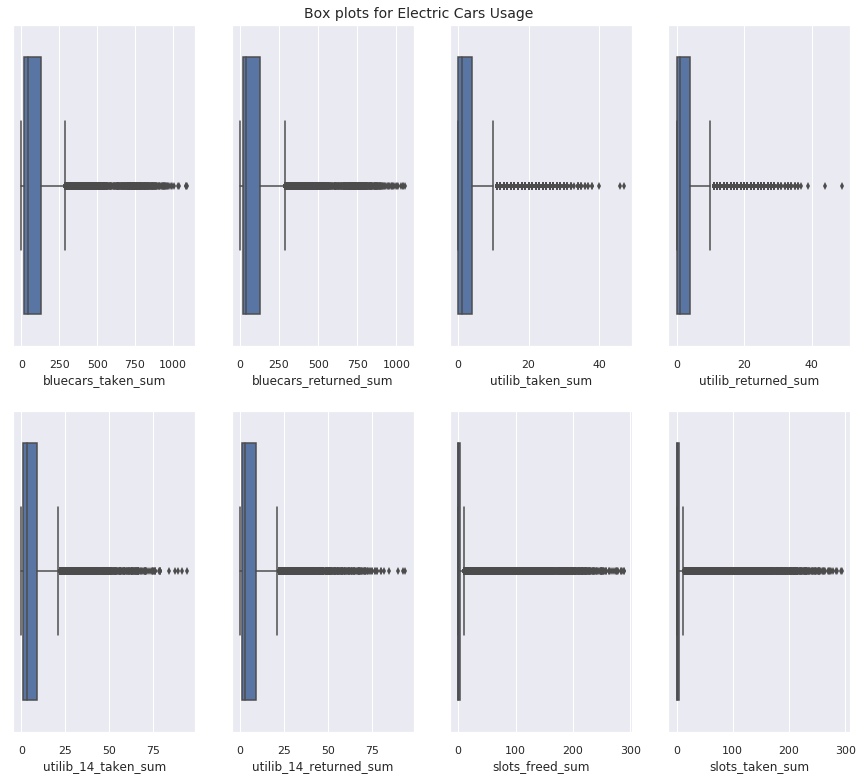

In [322]:
# checking for outliers in columns[3:]

box, axx = plt.subplots(2,4, figsize=(15,13))
box.suptitle('Box plots for Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(axx.flatten(), autob.columns[3:]):   
  sns.boxplot(autob[column], ax=ax)
  
# boxplots indicate presence of numerous outliers in plotted columns
# however, we will not drop outliers since they are reasonable/realistic
# autolib had about 3900 registered eletric cars
    

In [0]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters(np.datetime64)

In [324]:
# using pandas profiling to get a summarized report of the dataset
pp.ProfileReport(autob)

Number of variables,12
Number of observations,11544
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,6


## Exploratory Data Analysis

In [325]:
# ckecking for unique values in the postal_code column

print(autob.postal_code.unique())
print('\nNumber of unique values in postal_code column: %d' % len(autob.postal_code.unique()))

# there are 104 distinct postal codes in the postal_code column

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]

Number of unique values in postal_code column: 104


In [326]:
# checking for the sum of bluecars taken in each day of the week excluding the weekend

autob.groupby('dayofweek')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

# most bluecars (i.e., 288,546) are taken on Friday
# Monday and Thursday follow in second and third respectively

,bluecars_taken_sum
dayofweek,
4,288546
0,263893
3,263207
1,261940
2,261849


In [327]:
autob.groupby('dayofweek')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

# most bluecars (i.e., 285,029) are returned on Friday
# Monday and Thursday follow in second nd third respectively

,bluecars_returned_sum
dayofweek,
4,286029
0,264808
3,262961
2,260673
1,260470


## Data Analysis

### Univariate Analysis

#### Frequency Tables

In [328]:
# frequency table of bluecars_returned_sum column

autob['dayofweek'].value_counts()

0    2374
1    2363
4    2271
3    2268
2    2268
Name: dayofweek, dtype: int64

#### Measures of Central Tendency

In [329]:
# descriptive statistics of the columns in the dataframe

autob.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [330]:
# mean of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum & slots_taken_sum 

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('mean of {}: {:.2f}' .format(column, autob[column].mean()))

mean of bluecars_returned_sum: 115.64
mean of bluecars_taken_sum: 116.03
mean of slots_freed_sum: 20.95
mean of slots_taken_sum: 20.92


In [331]:
# median of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum, slots_taken_sum 

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('median of %s: %d' % (column, autob[column].median()))

median of bluecars_returned_sum: 42
median of bluecars_taken_sum: 42
median of slots_freed_sum: 0
median of slots_taken_sum: 0


In [332]:
# mode of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum, slots_taken_sum & of dayofweek

num_co = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum', 'dayofweek']

for column in num_co:
  print('mode of %s: %d' % (column, autob[column].mode()))
  
# day 0/Monday features the most in the dataset
# in most cases, the sum of either returned bluecars or taken bluecars was 12


mode of bluecars_returned_sum: 12
mode of bluecars_taken_sum: 12
mode of slots_freed_sum: 0
mode of slots_taken_sum: 0
mode of dayofweek: 0


#### Measures of Spread/Dispersion

In [333]:
# standard deviation of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('Standard deviation of {}: {:.2f}' .format(column, autob[column].std()))
  
# there is great standard deviation in the distribution of the sum of bluecars taken 

Standard deviation of bluecars_returned_sum: 168.34
Standard deviation of bluecars_taken_sum: 169.63
Standard deviation of slots_freed_sum: 47.90
Standard deviation of slots_taken_sum: 47.85


In [334]:
# variance of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('Variance of {}: {:.2f}' .format(column, autob[column].var()))

# there is a significantly high variance in the distribution of bluecars taken 


Variance of bluecars_returned_sum: 28339.96
Variance of bluecars_taken_sum: 28773.29
Variance of slots_freed_sum: 2294.43
Variance of slots_taken_sum: 2289.49


In [335]:
# skewness of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

num_col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in num_col:
  print('Skewness of {}: {:.2f}' .format(column, autob[column].skew()))

  
# the distribution of bluecars taken and slots taken exhibit positive skewness (i.e., are skewed to the right)
# the modes of bluecars taken & slotes taken are less than the mean of bluecars taken and slots taken respectively.

Skewness of bluecars_returned_sum: 2.33
Skewness of bluecars_taken_sum: 2.33
Skewness of slots_freed_sum: 2.54
Skewness of slots_taken_sum: 2.54


In [336]:
# kurtosis of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

for column in num_col:
  print('Kurtosis of {}: {:.2f}' .format(column, autob[column].kurt()))
  
# distribution of the sum of bluecars taken and sum of slots taken 
# has positive kurtosis indicating the presence/profusion of outliers
# distribution can be described as heavy-tailed/leptokurtic

Kurtosis of bluecars_returned_sum: 5.54
Kurtosis of bluecars_taken_sum: 5.55
Kurtosis of slots_freed_sum: 6.01
Kurtosis of slots_taken_sum: 6.00


In [337]:
# range of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

for column in num_col:
  
  maxi = autob[column].max()
  mini = autob[column].min()
  
  range_col = maxi - mini
  
  print('Range of {}: {:.2f}' .format(column, range_col))

# range in the sum of bluecars taken is 1093
  

Range of bluecars_returned_sum: 1056.00
Range of bluecars_taken_sum: 1093.00
Range of slots_freed_sum: 288.00
Range of slots_taken_sum: 294.00


In [338]:
# first, second and third quantiles of the sum of bluecars and slots taken and returned

for column in num_col:
  quant = autob[column].quantile([0.25,0.5,0.75])
  
  print('\nfirst, second and third quantiles for {}: \n{}'.format(column, quant))


first, second and third quantiles for bluecars_returned_sum: 
0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64

first, second and third quantiles for bluecars_taken_sum: 
0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64

first, second and third quantiles for slots_freed_sum: 
0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64

first, second and third quantiles for slots_taken_sum: 
0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


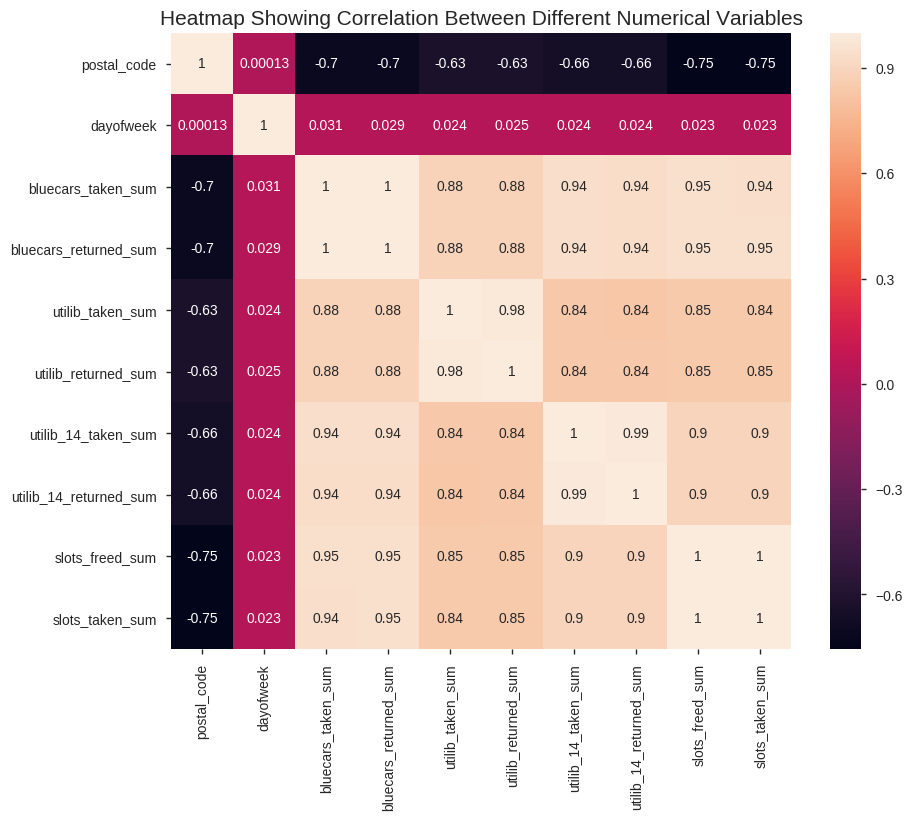

In [339]:
heatmap = autob.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns, annot=True)

plt.title('Heatmap Showing Correlation Between Different Numerical Variables', fontsize=15)
plt.show()

#### Data Visualization

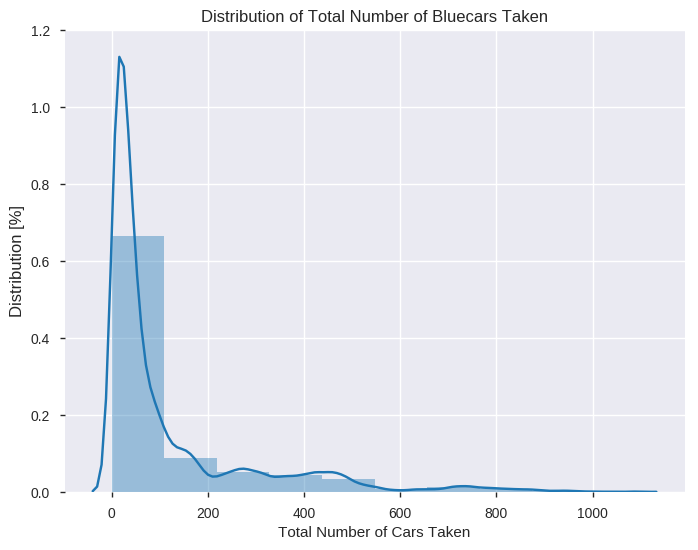

In [340]:
plt.figure(figsize=(8,6))
dis = sns.distplot(autob.bluecars_taken_sum, bins=10)
plt.xlabel('Total Number of Cars Taken')
plt.yticks(dis.get_yticks(), dis.get_yticks() * 100)
plt.ylabel('Distribution [%]', fontsize=12)
plt.title('Distribution of Total Number of Bluecars Taken')
plt.show()



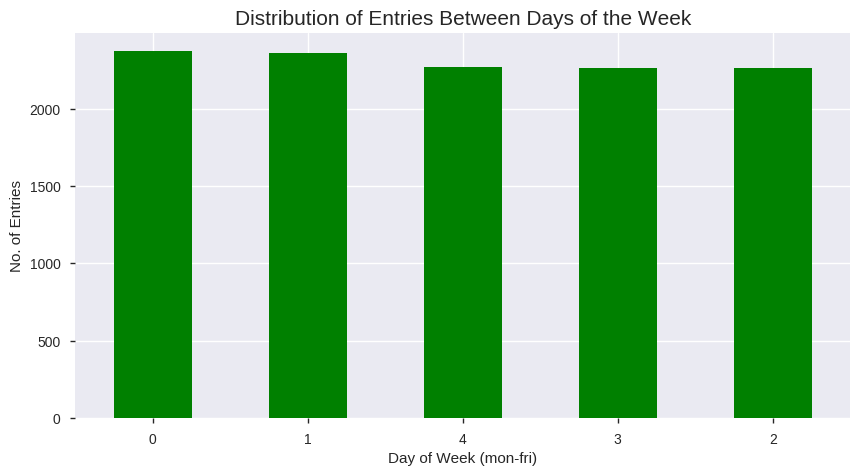

In [341]:
autob.dayofweek.value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.xticks(rotation=360)
plt.xlabel('Day of Week (mon-fri)')
plt.ylabel('No. of Entries')
plt.title('Distribution of Entries Between Days of the Week', fontsize=15)
plt.show()

# no. of entries for each day of week are somewhat evenly distributed ranging between 2200-2400
# monday and tuesday had slightly more entries

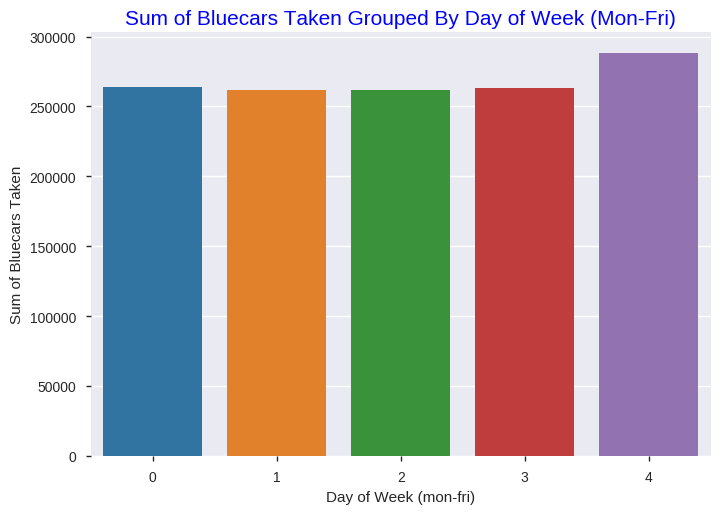

In [342]:
au = autob.groupby(autob['dayofweek'])[['bluecars_taken_sum']].sum()

# plotting a bar graph of Sum of bluecars taken vs Day of Week
sns.barplot(x=au.index, y=au.bluecars_taken_sum)
plt.ylabel('Sum of Bluecars Taken')
plt.xlabel('Day of Week (mon-fri)')
plt.title('Sum of Bluecars Taken Grouped By Day of Week (Mon-Fri)', fontsize=15, color='blue')
plt.show()

# total sum of bluecars taken is relatively similar between Monday(0) and Thursday(3)
# Friday recorded the highest total number of bluecars taken

In [343]:
# population mean of sum of bluecars taken
popmean = au.bluecars_taken_sum.mean()
popmean

267887.0

In [344]:
autob.shape

# population has 11,544 rows and 11 columns

(11544, 11)

In [345]:
# using simple random sampling to create a sample that is 30% of the data
samp = autob.sample(frac=0.3, random_state=101)
samp.head()


,postal_code,date,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5677,92170,2018-03-09,4,83,84,0,0,5,4,0,0
3738,78140,2018-06-15,4,31,31,1,0,4,4,0,0
7153,92270,2018-05-31,3,30,24,0,0,3,5,0,0
14707,94340,2018-01-26,4,48,51,0,0,4,3,0,0
7921,92330,2018-05-08,1,44,40,1,2,5,9,4,2


In [346]:
samp.shape

# our sample (created from the autob datframe) has 3,463 rows and 11 columns 

(3463, 11)

In [347]:
ausa = samp.groupby('dayofweek')[['bluecars_taken_sum']].sum()
ausa

,bluecars_taken_sum
dayofweek,
0,80151
1,81031
2,79700
3,80698
4,89593


In [348]:
samean = ausa.bluecars_taken_sum.mean()
samean

82234.6

In [349]:
# getting the zscore of sample

zs = (popmean - samean)/ ausa.bluecars_taken_sum.std() 
print('z-score: {:.4f}' .format(zs))

z-score: 44.7904


In [350]:
from scipy import stats
from scipy.stats import norm


pval = 1 - stats.norm.cdf(zs)
print('p-value: {:.4f}' .format(pval))

# p-value is zero and we therefore reject the null hypothesis and accept the alternative hypothesis
# we conclude there is a difference in the sum of bluecars taken between monday and friday

p-value: 0.0000


In [351]:
autob.bluecars_taken_sum.sum() / autob.shape[0]

116.0286729036729

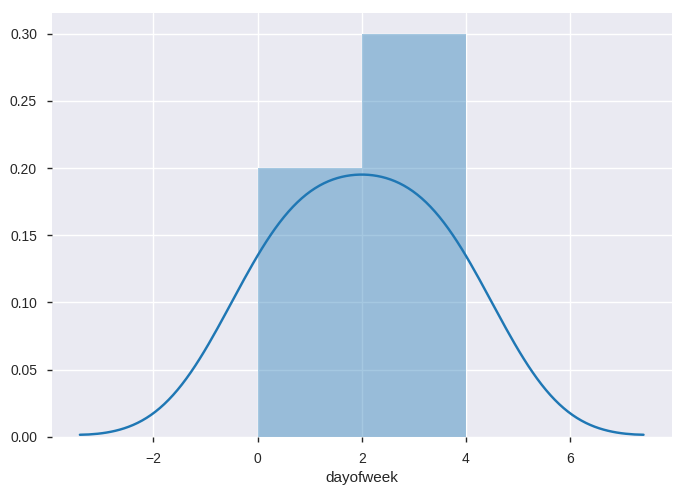

In [352]:
sns.distplot(au.index)

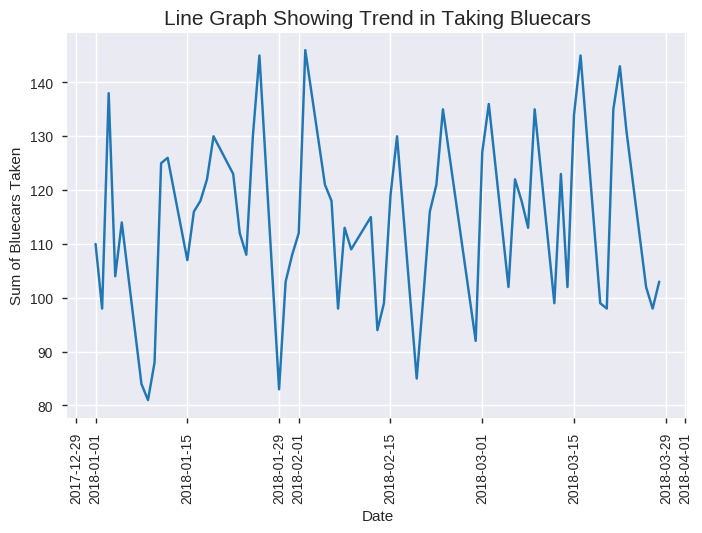

In [353]:
autm = autob.iloc[:61,:]   # selecting the first 60 observations from the autob dataframe.

# plotting a line graph of sum of bluecars taken and sum of recharging slots freed
plt.figure(figsize=(8,5))
plt.plot(autm.date, autm.bluecars_taken_sum)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sum of Bluecars Taken')
plt.title('Line Graph Showing Trend in Taking Bluecars', fontsize=15)
plt.show()

# output reveals a constant fluctuation in the trend of taking bluecars
# for the three month period between 2017/12/29 - 2018/03/29

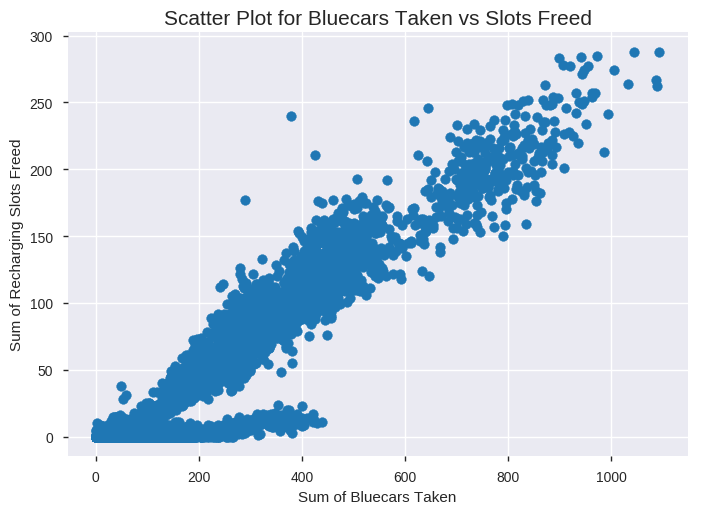

In [354]:
plt.scatter(autob.bluecars_taken_sum, autob.slots_freed_sum)
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Recharging Slots Freed')
plt.title('Scatter Plot for Bluecars Taken vs Slots Freed', fontsize=15)
plt.show()

# scatter plot reveals sum of bluecars taken and sum of slots freed are highly correlated (i.e positive correlation)

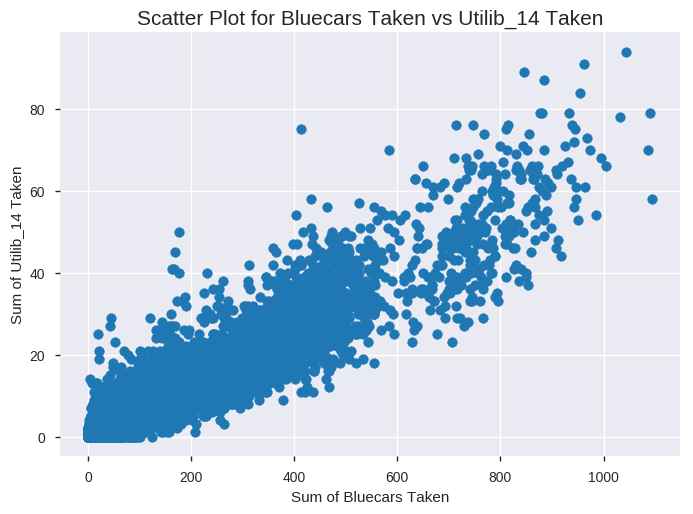

In [355]:
plt.scatter(autob.bluecars_taken_sum, autob.utilib_14_taken_sum)
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Utilib_14 Taken')
plt.title('Scatter Plot for Bluecars Taken vs Utilib_14 Taken', fontsize=15)
plt.show()

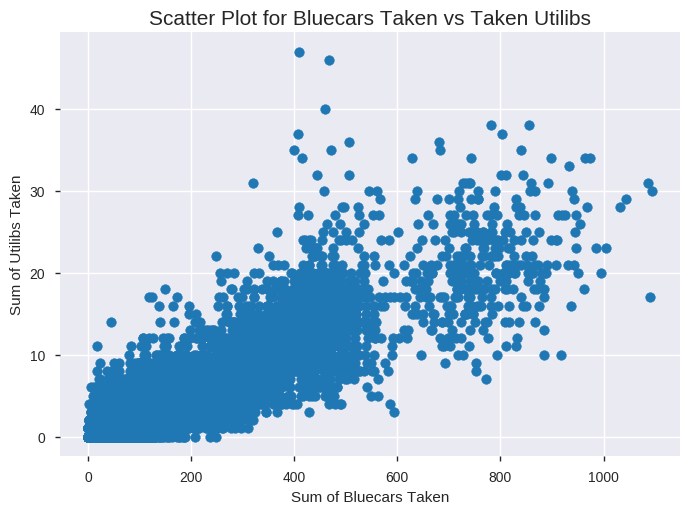

In [356]:
plt.scatter(autob.bluecars_taken_sum, autob.utilib_taken_sum)
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Utilibs Taken')
plt.title('Scatter Plot for Bluecars Taken vs Taken Utilibs', fontsize=15)
plt.show()

# scatter plot shows a positive correlation between sum of returned utilibs and sum of bluecars taken

In [357]:
# pearson/standard correlation coefficient between sum of bluecars taken and sum of utilibs returned

pearson = autob.bluecars_taken_sum.corr(autob.utilib_returned_sum, method='pearson')
print('pearson correlation coefficient: %.4f' % pearson)

# output reveals a strong positive correlation between the sum of bluecars taken and the sum of utilibs returned

pearson correlation coefficient: 0.8839


In [358]:
autob.dayofweek.unique()

array([0, 1, 2, 3, 4])

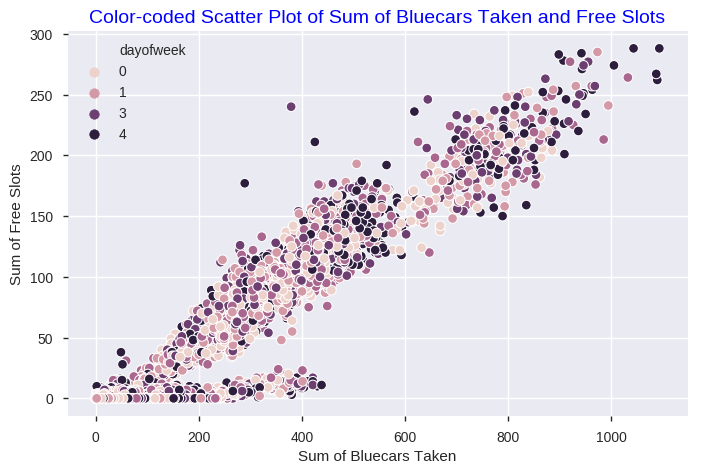

In [359]:
# color-coded scatter plots
plt.figure(figsize=(8,5))
sns.scatterplot(x=autob.bluecars_taken_sum, y=autob.slots_freed_sum, hue=autob['dayofweek'])
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Free Slots')
plt.title('Color-coded Scatter Plot of Sum of Bluecars Taken and Free Slots', fontsize=14, color='blue')
plt.show()

# the color-coded scatter plot reveals that on Fridays (black dots), the sum of
# bluecars taken is often higher abd this is accompanied with an increase in number of recharging slots that are available.

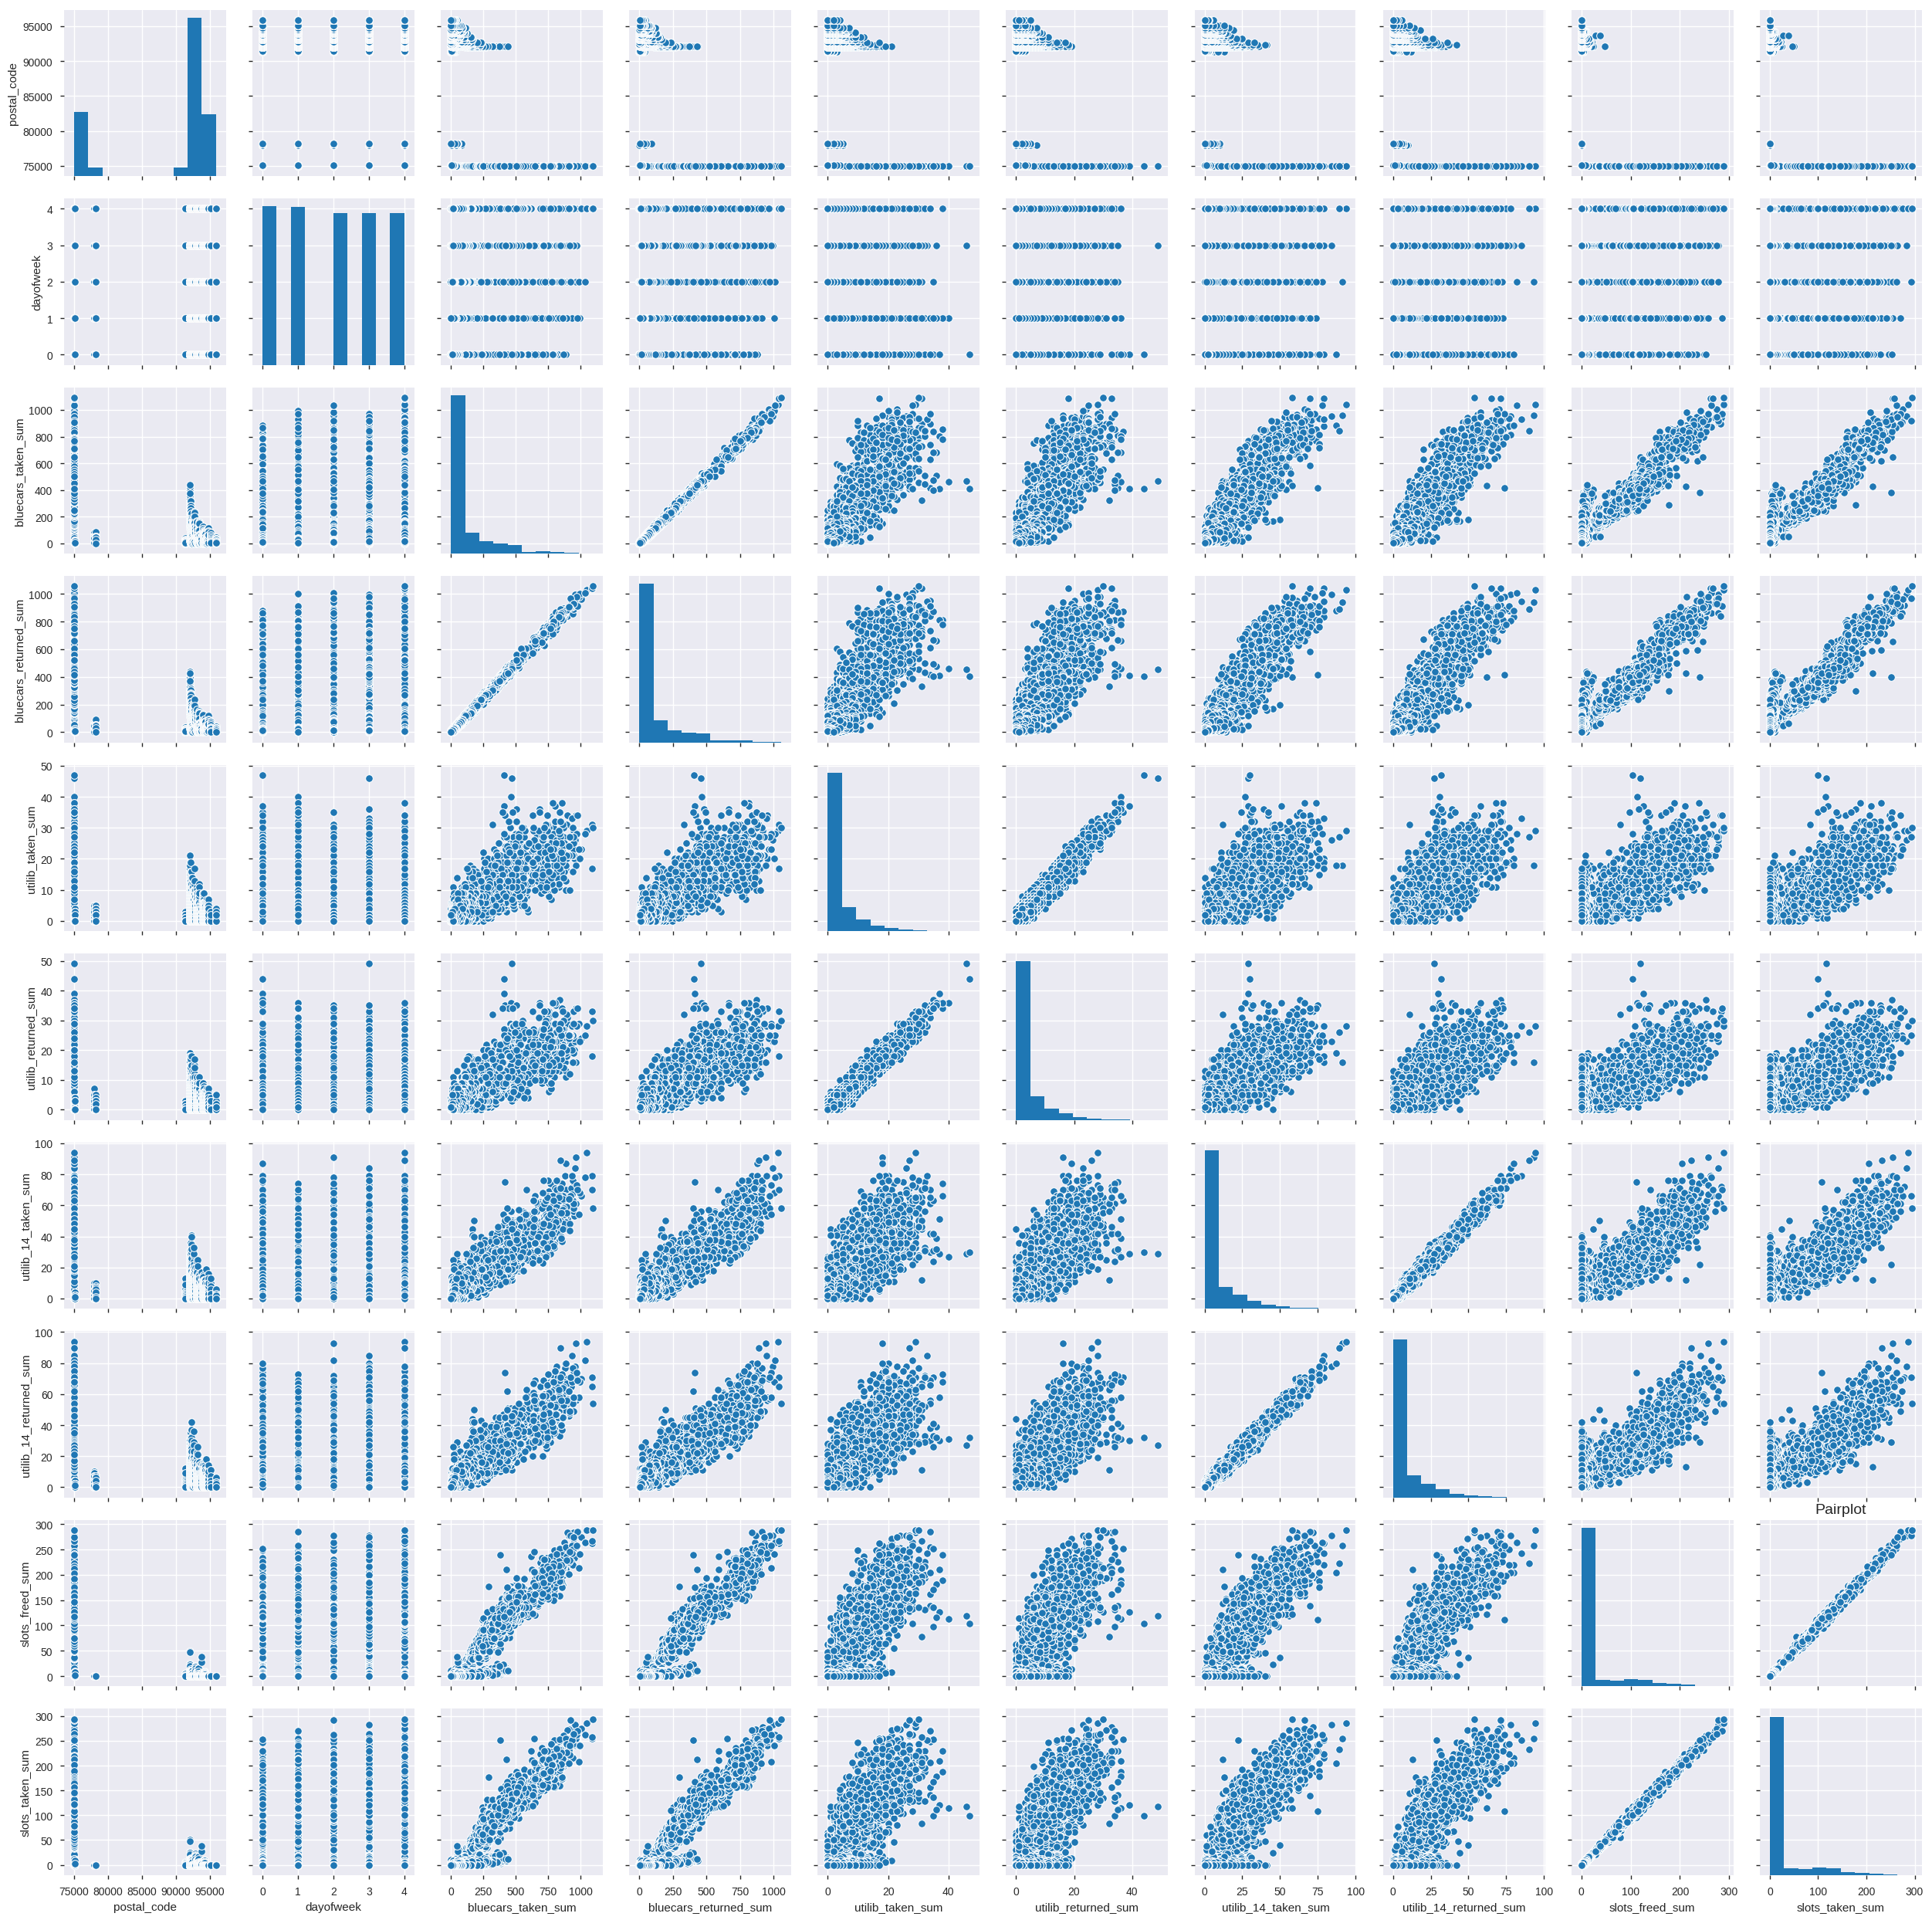

In [360]:
# pairplot of scatter plot and histogram of the columns in the dataframe
sns.pairplot(autob)
plt.title('Pairplot', fontsize=14)
plt.show()

In [361]:
autob.corr()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000130,-0.701709,-0.701877,-0.629116,-0.629190,-0.661567,-0.661256,-0.754730,-0.754422
dayofweek,0.000130,1.000000,0.030798,0.028943,0.024498,0.025010,0.024469,0.024331,0.022517,0.022582
bluecars_taken_sum,-0.701709,0.030798,1.000000,0.998780,0.884239,0.883856,0.938730,0.937613,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.028943,0.998780,1.000000,0.884533,0.884332,0.939084,0.938248,0.945758,0.946006
utilib_taken_sum,-0.629116,0.024498,0.884239,0.884533,1.000000,0.979469,0.836193,0.835359,0.845480,0.844701
utilib_returned_sum,-0.629190,0.025010,0.883856,0.884332,0.979469,1.000000,0.835772,0.835549,0.845527,0.845376
utilib_14_taken_sum,-0.661567,0.024469,0.938730,0.939084,0.836193,0.835772,1.000000,0.990960,0.895978,0.895574
utilib_14_returned_sum,-0.661256,0.024331,0.937613,0.938248,0.835359,0.835549,0.990960,1.000000,0.895244,0.895647
slots_freed_sum,-0.754730,0.022517,0.945700,0.945758,0.845480,0.845527,0.895978,0.895244,1.000000,0.999154
slots_taken_sum,-0.754422,0.022582,0.944855,0.946006,0.844701,0.845376,0.895574,0.895647,0.999154,1.000000


In [362]:
autoli = autob.drop(['postal_code', 'bluecars_returned_sum', 'utilib_returned_sum', 'utilib_14_returned_sum'], 1)
autoli.columns

Index(['date', 'dayofweek', 'bluecars_taken_sum', 'utilib_taken_sum',
       'utilib_14_taken_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

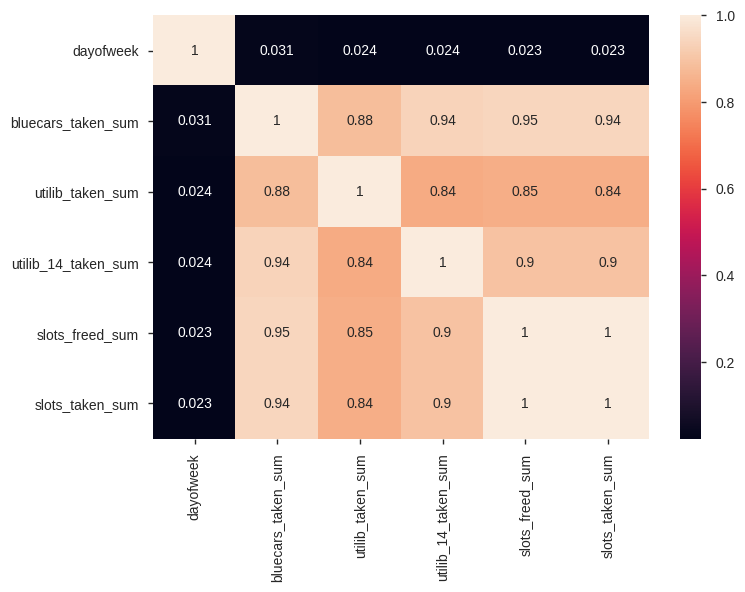

In [363]:
sns.heatmap(autoli.corr(), annot=True)

In [364]:
features = autoli.drop(['bluecars_taken_sum'], 1)
target = autoli['bluecars_taken_sum']

features.head()

,date,dayofweek,utilib_taken_sum,utilib_14_taken_sum,slots_freed_sum,slots_taken_sum
0,2018-01-01,0,3,10,22,20
1,2018-01-02,1,1,8,23,22
2,2018-01-03,2,0,2,27,27
3,2018-01-04,3,2,9,25,21
4,2018-01-05,4,3,6,18,20


In [365]:
features[['year', 'month', 'day']] = features.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(',')))
features.head()

,date,dayofweek,utilib_taken_sum,utilib_14_taken_sum,slots_freed_sum,slots_taken_sum,year,month,day
0,2018-01-01,0,3,10,22,20,2018,01,01
1,2018-01-02,1,1,8,23,22,2018,01,02
2,2018-01-03,2,0,2,27,27,2018,01,03
3,2018-01-04,3,2,9,25,21,2018,01,04
4,2018-01-05,4,3,6,18,20,2018,01,05


In [366]:

features.dtypes


date                   datetime64[ns]
dayofweek                       int64
utilib_taken_sum                int64
utilib_14_taken_sum             int64
slots_freed_sum                 int64
slots_taken_sum                 int64
year                           object
month                          object
day                            object
dtype: object

In [367]:

for column in features.columns[6:]:
  features[column] = features[column].astype(int)
features.dtypes

date                   datetime64[ns]
dayofweek                       int64
utilib_taken_sum                int64
utilib_14_taken_sum             int64
slots_freed_sum                 int64
slots_taken_sum                 int64
year                            int64
month                           int64
day                             int64
dtype: object

In [369]:
features.drop(['date', 'year'], 1, inplace=True)
features.columns

Index(['dayofweek', 'utilib_taken_sum', 'utilib_14_taken_sum',
       'slots_freed_sum', 'slots_taken_sum', 'month', 'day'],
      dtype='object')

In [0]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=45)


In [0]:
linre = LinearRegression()
res = linre.fit(features_train, target_train)

In [0]:
pred = linre.predict(features_test)

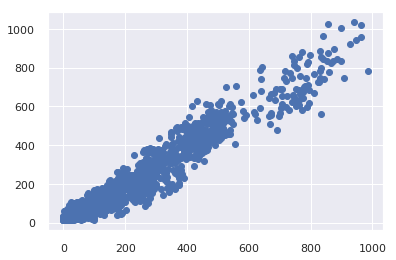

In [377]:
plt.scatter(target_test, pred)

In [378]:
r2_score(target_test,pred)

0.9462799710579674

In [379]:
(linre.coef_, linre.intercept_)

(array([ 0.90803644,  6.15038465,  5.48051754,  2.16568999, -0.636727  ,
        -0.72586692, -0.11484885]), 21.097293141148825)

In [380]:
fet2 = sm.add_constant(features.values)
model = sm.OLS(target, fet2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     bluecars_taken_sum   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 2.887e+04
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:14:27   Log-Likelihood:                -58794.
No. Observations:               11544   AIC:                         1.176e+05
Df Residuals:                   11536   BIC:                         1.177e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4748      1.211     17.731      0.0